In [1]:
import numpy as np
from finches.frontend.interlogo import  display_protein_interaction_logo_visualization
from finches.frontend.mpipi_frontend import Mpipi_frontend
from matplotlib import pyplot as plt

In [2]:
mf = Mpipi_frontend()

In [3]:
if __name__ == '__main__':
    # Example Data with unnormalized scores
    top_logo_unnormalized = [
        {'A': 80, 'G': 20, 'C': 10},      # Max here is 80
        {'C': 25, 'T': 25},             # Max here is 25
        {'G': 100},                     # Max here is 100 -> Global max for top is 100
        {'A': 5, 'C': 10, 'G': 15, 'T': 20}, # Max here is 20
        {'L': 35, 'P':15}               # Max here is 35
    ]
    middle_sequence_example = ['A', 'C', 'G', 'N', 'L']
    bottom_logo_unnormalized = [
        {'T': 70, 'A': 10, 'G':20},     # Max here is 70 -> Global max for bottom is 70
        {'G': 30, 'C': 20, 'A':5},      # Max here is 30
        {'A': 45, 'T':5},              # Max here is 45
        {'C': 20, 'G': 15, 'T': 10, 'A': 5}, # Max here is 20
        {'P': 30, 'S':20}               # Max here is 30
    ]
    integer_sequence_example = [10, -5, 100, 0, 25]
    amino_acid_colors = {
        'A': 'darkgreen', 'C': 'blue', 'G': 'orange', 'T': 'red', 
        'N': '#808080', 
        'L': '#0075A3', 'P': '#A30075', 'S': '#A37500' 
    }

    print("Displaying with UNNORMALIZED data (normalize_logo_heights_globally=True by default):")
    # With normalize_logo_heights_globally=True (default), height_per_unit_size (60px) will be the
    # height of 'G' in the 3rd position of top_logo (original score 100)
    # and 'T' in the 1st position of bottom_logo (original score 70).
    display_protein_interaction_logo_visualization(
        top_logo_data=top_logo_unnormalized,
        middle_sequence=middle_sequence_example,
        bottom_logo_data=bottom_logo_unnormalized,
        color_map=amino_acid_colors,
        integer_sequence=integer_sequence_example,
        height_per_unit_size=60.0, # Max height for the globally largest item in top/bottom logos
        position_width_px=35.0,
        middle_row_char_height_px=35.0,
        middle_row_font_size_px=22.0,
        middle_row_background_color="#f0f8ff",
        logo_min_char_height_px=2.0, # Min height for any char block, even if score is tiny
        logo_min_font_size_px=7.0,
        integer_row_height_px=30.0,
        integer_row_font_size_px=14.0,
        integer_row_background_color="#fff8f0",
        integer_row_font_color="#4a4a4a"
    )

    print("\nDisplaying with UNNORMALIZED data but NO global normalization (normalize_logo_heights_globally=False):")
    # Sizes will be directly multiplied by height_per_unit_size (e.g., 0.5 * 100 = 50px)
    # This will result in very tall logos with the example unnormalized data if height_per_unit_size is large.
    # Using a smaller height_per_unit_size for this example.
    display_protein_interaction_logo_visualization(
        top_logo_data= top_logo_unnormalized,
        middle_sequence="ACGNLAD",
        bottom_logo_data=bottom_logo_unnormalized,
        #color_map=amino_acid_colors,
        integer_sequence=integer_sequence_example + [1,2],
        normalize_logo_heights_globally=False, # Turn off new normalization
        height_per_unit_size=0.5, # Raw score 100 becomes 50px (100 * 0.5)
        position_width_px=35.0
    )

Displaying with UNNORMALIZED data (normalize_logo_heights_globally=True by default):


A G C,C T,G,T G C A,L P
A,C,G,N,L
A G T,A C G,T A,A T G C,S P
10,-5,100,0,25



Displaying with UNNORMALIZED data but NO global normalization (normalize_logo_heights_globally=False):


,A G C,C T,G,T G C A,L P,
A,C,G,N,L,A,D
,A G T,A C G,T A,A T G C,S P,
10,-5,100,0,25,1,2


In [4]:
brca1_snip = "CGTNTHASSLQHENSSLLLTKDRMNVEKAE"
rg_sz = 7

res_a = mf.maximal_attractor(brca1_snip, region_size=rg_sz)

print(res_a[0])
print(res_a[1])

WWWWWWWWWWWWRWWWWWWWWWWR
[-0.71557675 -0.71211137 -0.71240003 -0.71326647 -0.71747097 -0.77468534
 -0.66986717 -0.69703505 -0.69703505 -0.69703505 -0.69703505 -0.66797205
 -0.71185817 -0.65922792 -0.57807391 -0.52739423 -0.52816927 -0.53277714
 -0.55763565 -0.55454665 -0.50694285 -0.50694285 -0.5547743  -0.66536307]


In [5]:
res_r = mf.maximal_repulsor(brca1_snip, region_size=rg_sz)

print(res_r[0])
print(res_r[1])

KKKKKKDDDDDDDTKTKKKKDDKD
[ 0.07188161  0.07334582  0.07730868  0.07999772  0.07804928  0.2497264
  0.06168627  0.04020711  0.04020711  0.04020711  0.04020711  0.06732341
  0.25720549 -0.08376631  0.30996272 -0.06737419  0.2576328   0.25317233
  0.22600035  0.22697327 -0.06326275 -0.06326275  0.23802357  0.2922189 ]


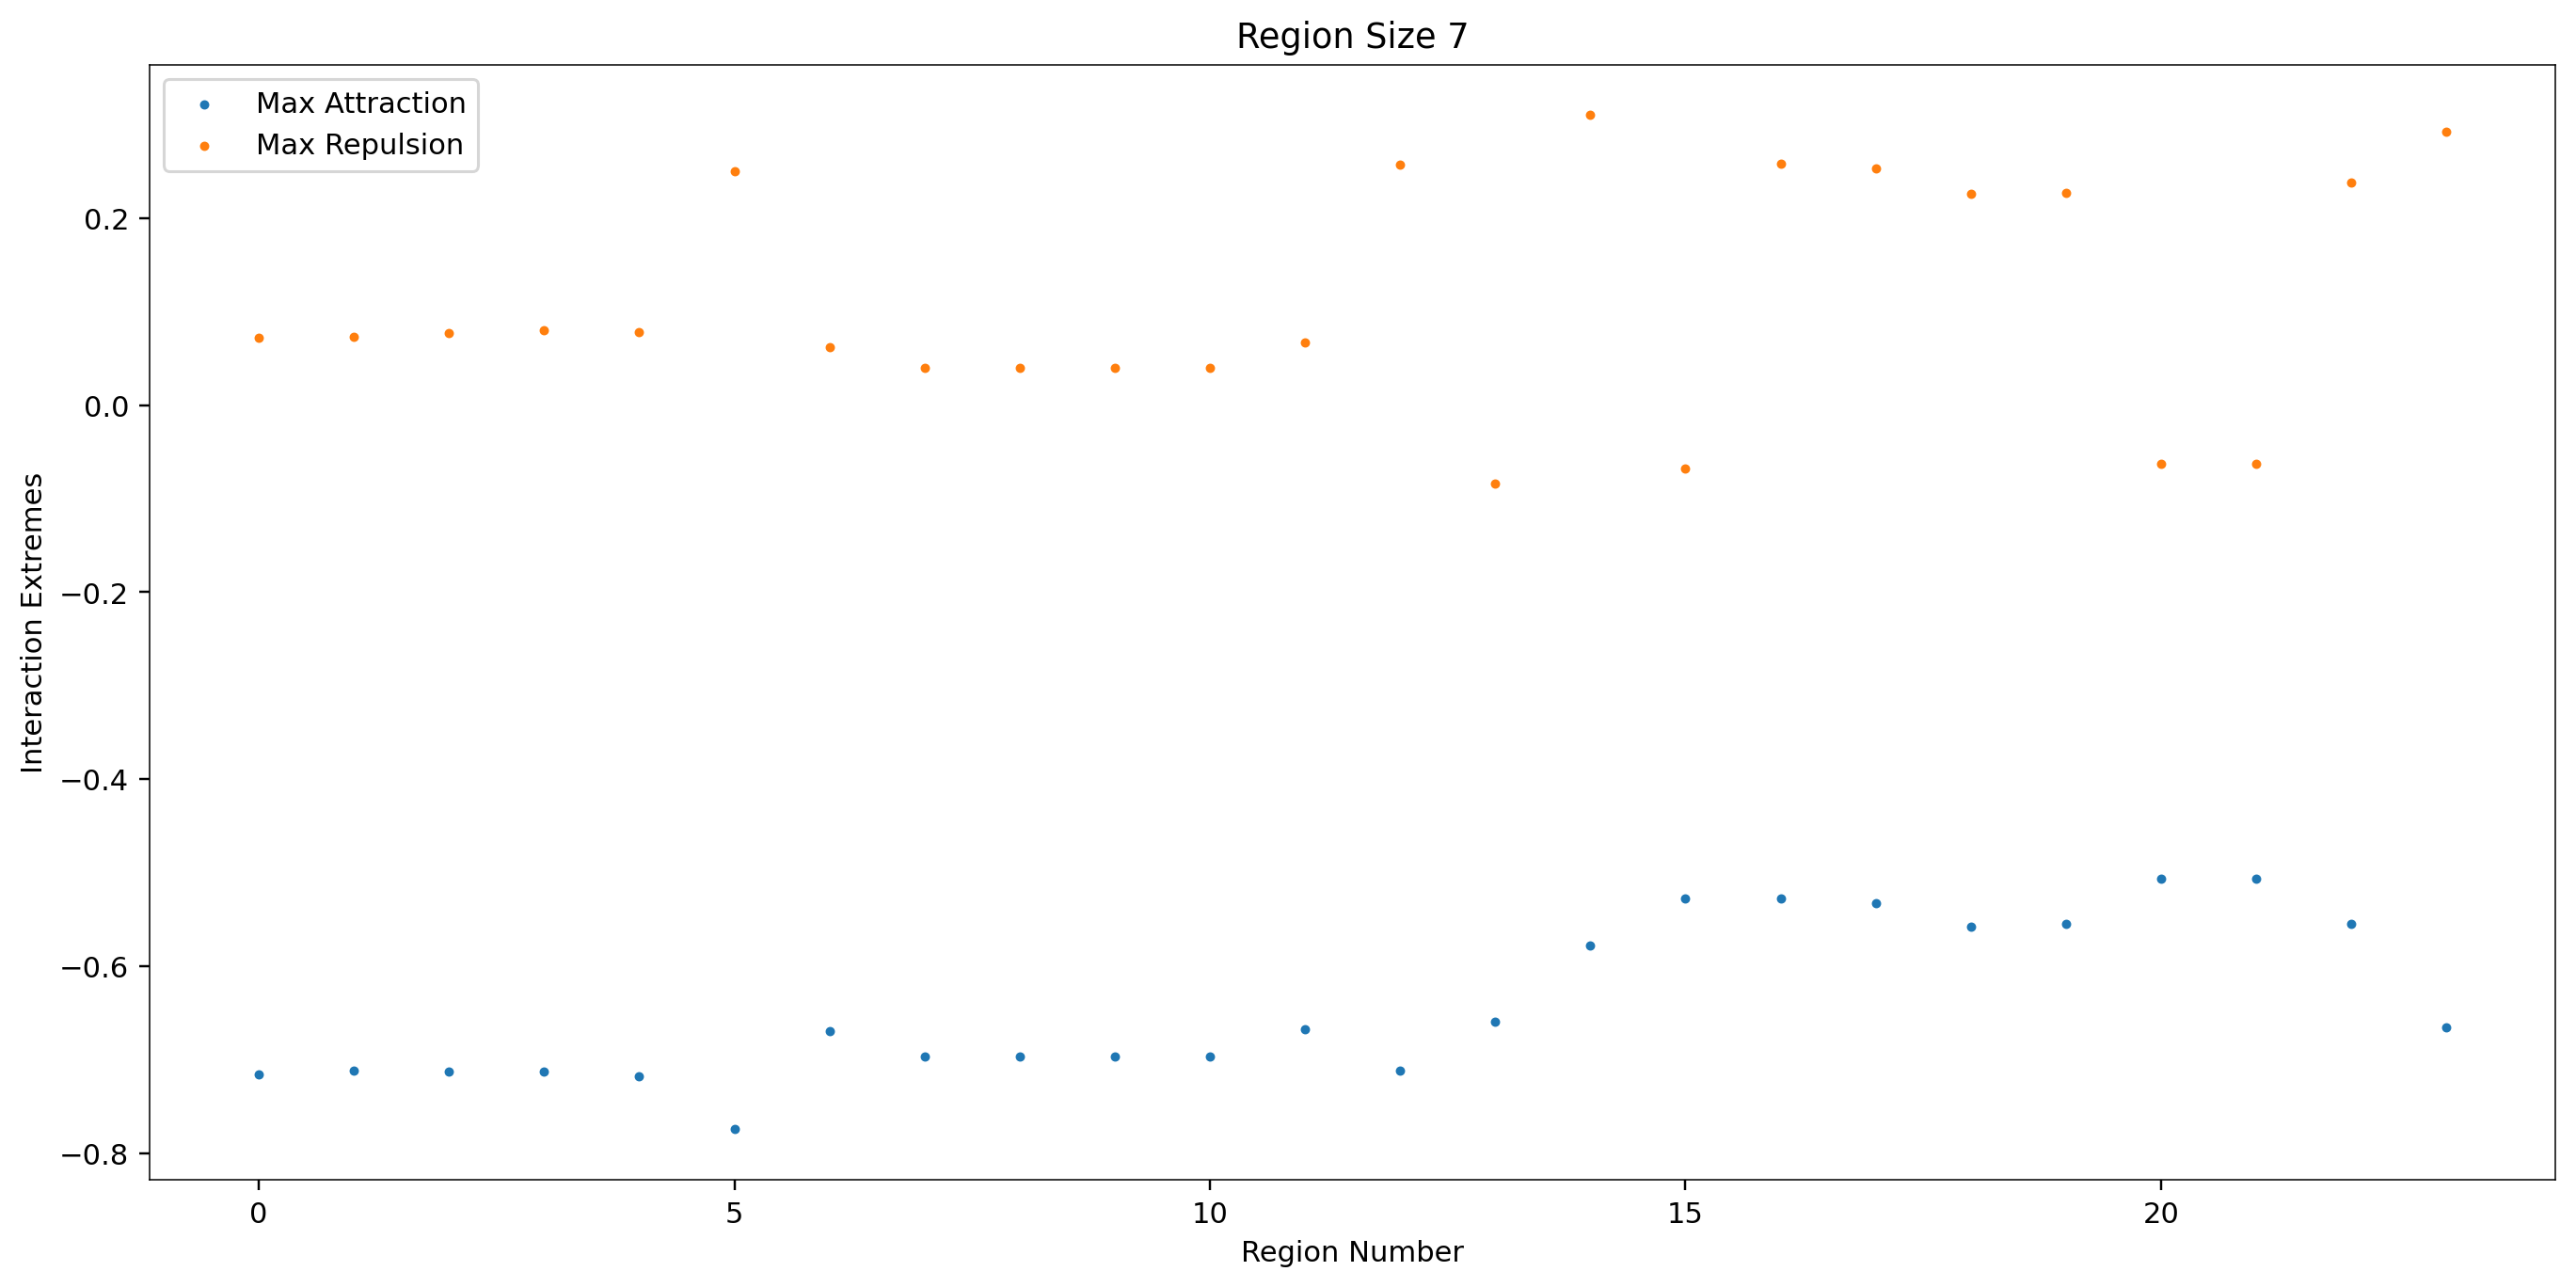

In [6]:
plt.figure(dpi=220, figsize=(15,7))
plt.scatter(np.arange(len(res_a[1])), res_a[1], s = 5, label = f"Max Attraction")
plt.scatter(np.arange(len(res_r[1])), res_r[1], s = 5, label = f"Max Repulsion")
plt.xlabel(f"Region Number")
plt.ylabel(f"Interaction Extremes")
plt.title(f"Region Size {rg_sz}")
plt.legend()

In [7]:
rg_sz = 1
res_tup = mf.produce_interaction_logos(brca1_snip, region_size=rg_sz)
display_protein_interaction_logo_visualization(*res_tup)

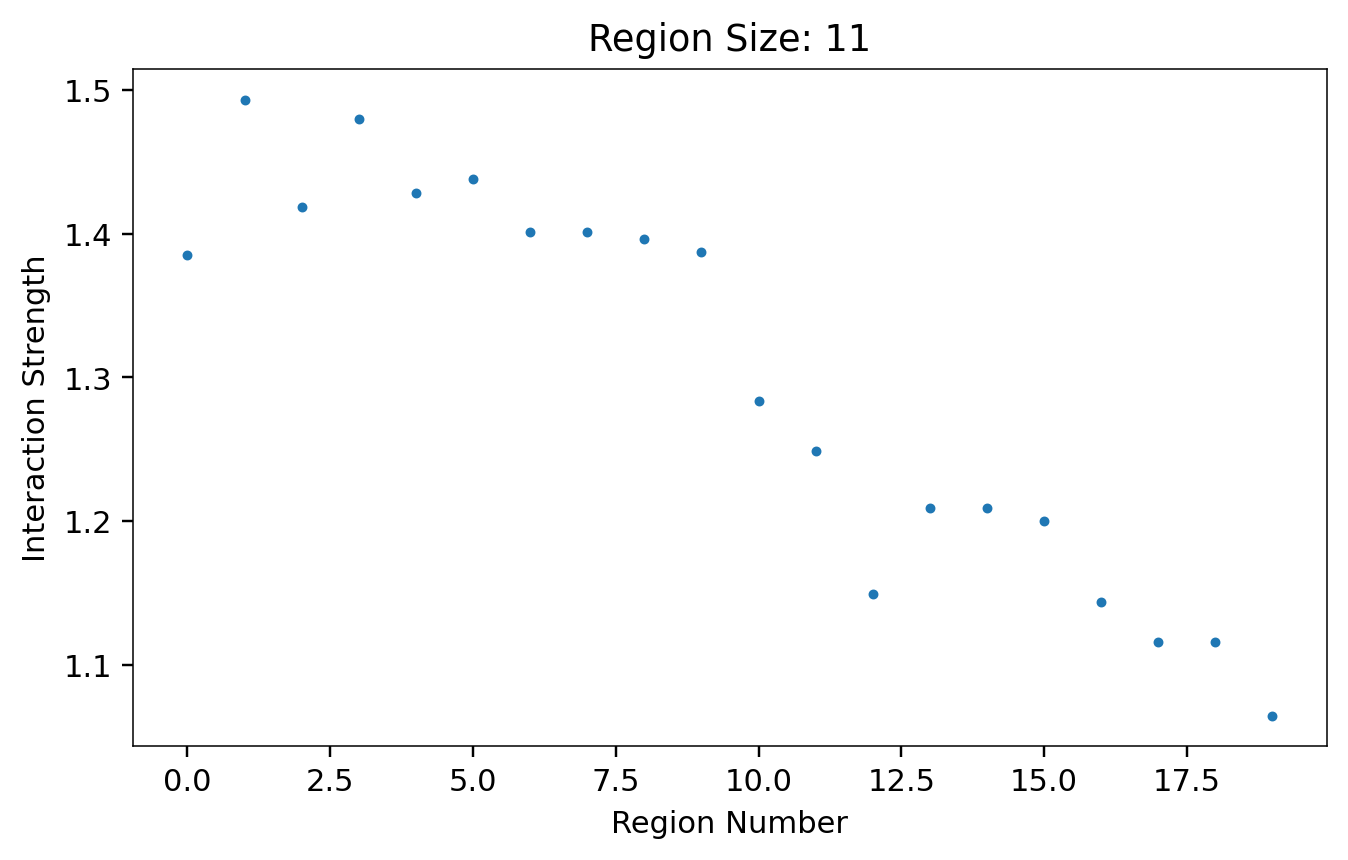

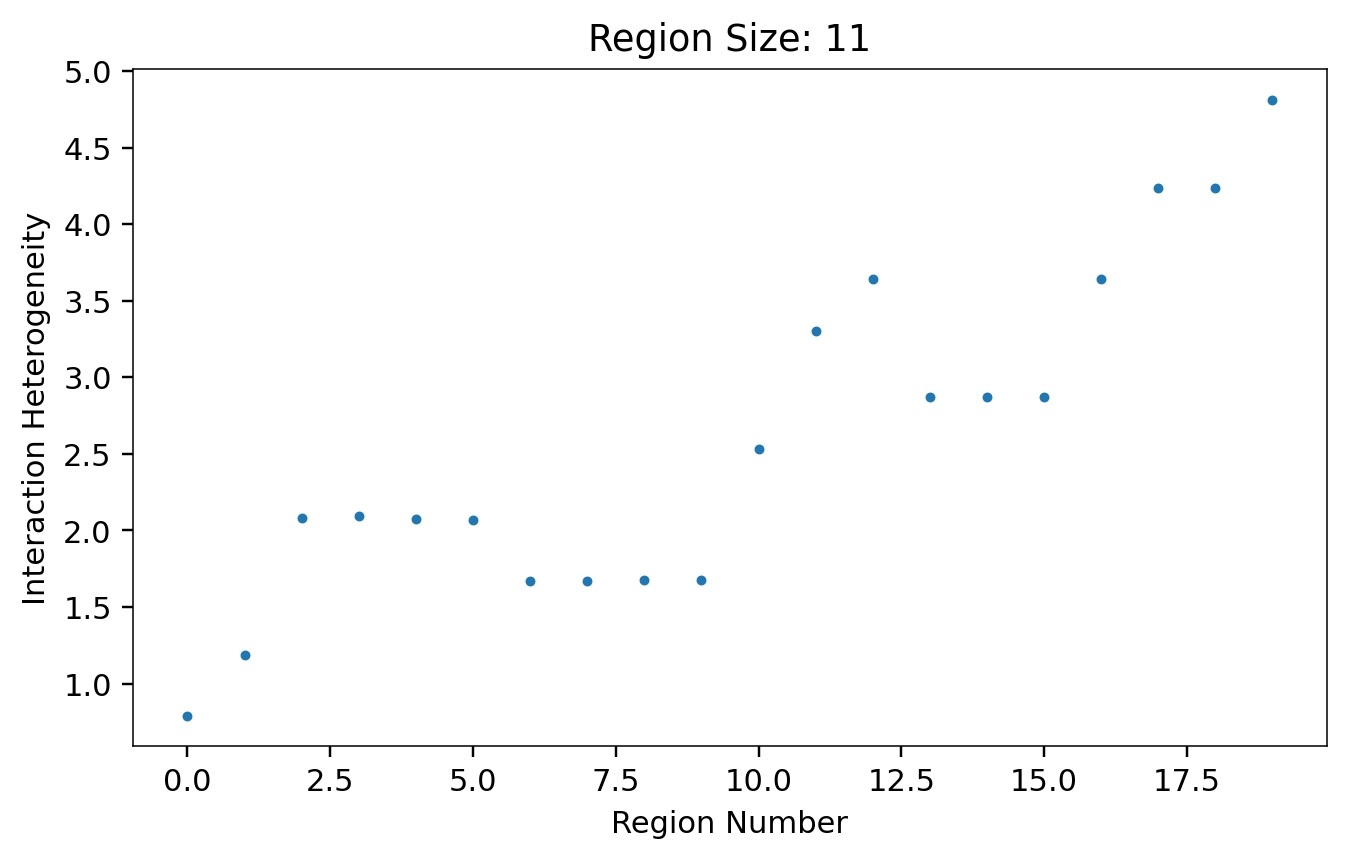

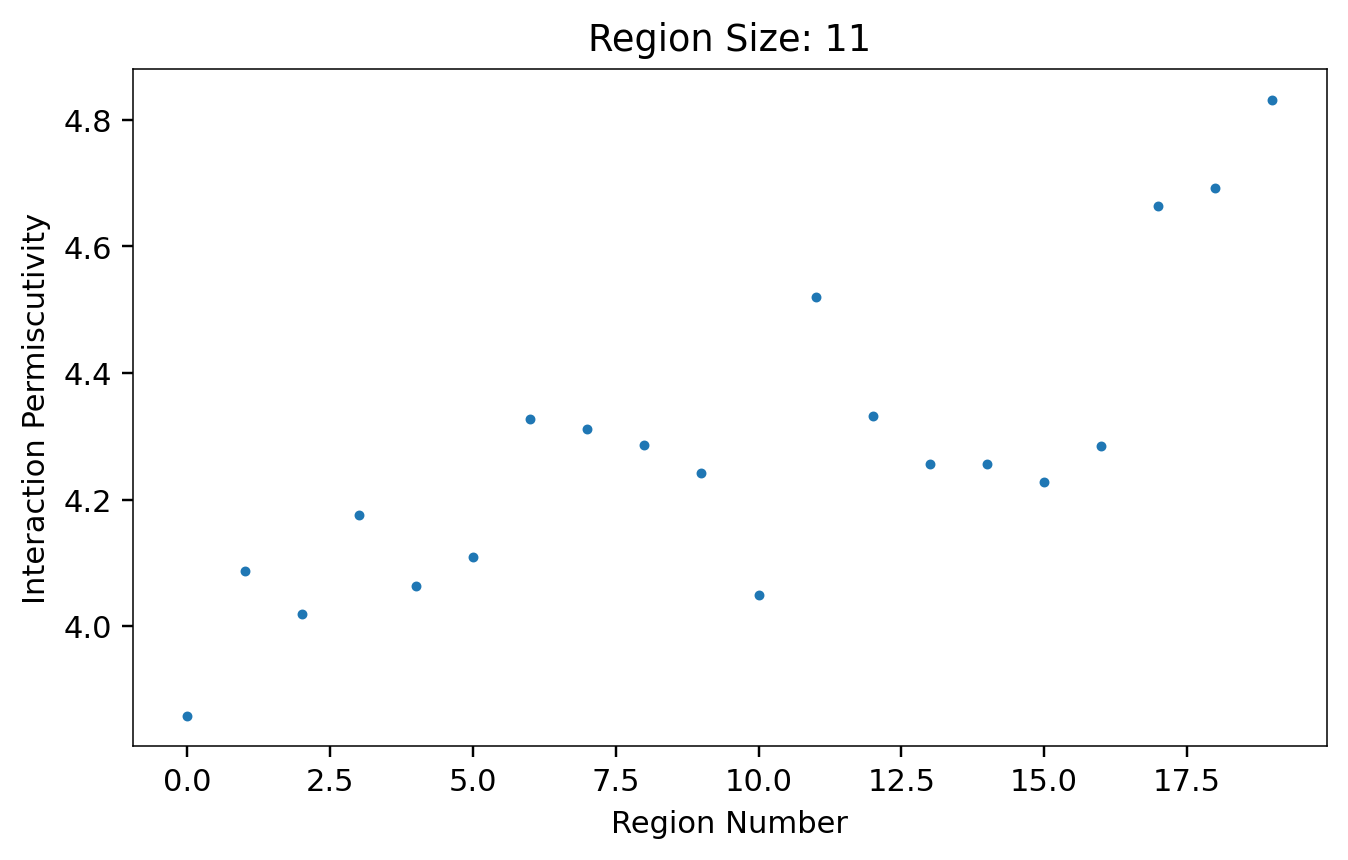

In [12]:
# compute and plot some of the other values
rg_sz = 11
ivals = mf.interaction_strength(brca1_snip, rg_sz)

plt.figure(dpi=220, figsize=(7,4))
plt.scatter(np.arange(len(ivals)), ivals, s=5)
plt.ylabel(f"Interaction Strength")
plt.xlabel(f"Region Number")
plt.title(f"Region Size: {rg_sz}")
plt.show()

h_vals = mf.chemical_interaction_heterogeneity(brca1_snip, rg_sz)
plt.figure(dpi=220, figsize=(7,4))
plt.scatter(np.arange(len(h_vals)), h_vals, s=5)
plt.ylabel(f"Interaction Heterogeneity")
plt.xlabel(f"Region Number")
plt.title(f"Region Size: {rg_sz}")
plt.show()

p_vals = mf.interaction_permiscutivity(brca1_snip, rg_sz, onlyfrac=False)
plt.figure(dpi=220, figsize=(7,4))
plt.scatter(np.arange(len(p_vals)), p_vals, s=5)
plt.ylabel(f"Interaction Permiscutivity")
plt.xlabel(f"Region Number")
plt.title(f"Region Size: {rg_sz}")
plt.show()

In [9]:
# decompose the plots onto individual residues
rg_sz = 5
res_tup = mf.produce_interaction_logos(brca1_snip, region_size=rg_sz, kernal_type='gaussian')
display_protein_interaction_logo_visualization(*res_tup)

,
